<a href="https://colab.research.google.com/github/Rey-Morales-G/Alura_Telecom_X/blob/main/TelecomX_LATAM_Rey_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Import libraries, Load the dataset, and inspect the data

## 1. Data Extraction
In this section, the dataset is loaded and a first inspection is performed to understand its structure.


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [142]:
#Load the data from GitHub link
url= "https://raw.githubusercontent.com/Rey-Morales-G/Alura_Telecom_X/main/TelecomX_Data.json"
df_raw= pd.read_json(url)

#Quick check
df_raw.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [143]:
#Check columns and size
print("Shape:", df_raw.shape)
print("Columns:", df_raw.columns.tolist())


Shape: (7267, 6)
Columns: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


#🔧 Transformación

## 2. Data Transformation
This section prepares the data for analysis by cleaning, formatting, and creating useful variables.


In [144]:
#Flatten nested dictionaries into normal columns
df= pd.json_normalize(df_raw.to_dict("records"))

print("Shape after normalize:",df.shape)
df.head()


Shape after normalize: (7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [145]:
#Show columns
for col in df.columns:
    print(col)


customerID
Churn
customer.gender
customer.SeniorCitizen
customer.Partner
customer.Dependents
customer.tenure
phone.PhoneService
phone.MultipleLines
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies
account.Contract
account.PaperlessBilling
account.PaymentMethod
account.Charges.Monthly
account.Charges.Total


In [146]:
#Rename nested columns
rename_map= {
    "customer.tenure": "tenure",
    "account.Contract": "Contract",
    "internet.InternetService": "InternetService",
    "account.Charges.Monthly": "MonthlyCharges",
    "account.Charges.Total": "TotalCharges",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod"
}

#Rename columns
rename_map= {k: v for k, v in rename_map.items() if k in df.columns}

df= df.rename(columns=rename_map)

print("Renamed columns:")
for k, v in rename_map.items():
    print(f"{k} -> {v}")



Renamed columns:
customer.tenure -> tenure
account.Contract -> Contract
internet.InternetService -> InternetService
account.Charges.Monthly -> MonthlyCharges
account.Charges.Total -> TotalCharges
account.PaperlessBilling -> PaperlessBilling
account.PaymentMethod -> PaymentMethod


In [147]:
#Convert churn Yes/No into numeric
df["Churn_flag"] = df["Churn"].map({"Yes": 1, "No": 0})

df[["Churn","Churn_flag"]].head()


,Churn,Churn_flag
0,No,0.0
1,No,0.0
2,Yes,1.0
3,Yes,1.0
4,Yes,1.0


In [148]:
#Convert numeric columns
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

#Check missing values after conversion
df[["tenure", "MonthlyCharges", "TotalCharges"]].isna().sum()



,0
tenure,0
MonthlyCharges,0
TotalCharges,11


In [149]:
#Confirm columns exist
df[["customerID","Churn","tenure","MonthlyCharges","TotalCharges","Contract","InternetService"]].head()


,customerID,Churn,tenure,MonthlyCharges,TotalCharges,Contract,InternetService
0,0002-ORFBO,No,9,65.6,593.30,One year,DSL
1,0003-MKNFE,No,9,59.9,542.40,Month-to-month,DSL
2,0004-TLHLJ,Yes,4,73.9,280.85,Month-to-month,Fiber optic
3,0011-IGKFF,Yes,13,98.0,1237.85,Month-to-month,Fiber optic
4,0013-EXCHZ,Yes,3,83.9,267.40,Month-to-month,Fiber optic


#📊 3 Carga y análisis

In [150]:
#Check that important columns are available for analysis
key_cols= ["Churn","Churn_flag","tenure","MonthlyCharges","TotalCharges","Contract","InternetService"]
for c in key_cols:
    print(c, "->", c in df.columns)


Churn -> True
Churn_flag -> True
tenure -> True
MonthlyCharges -> True
TotalCharges -> True
Contract -> True
InternetService -> True


In [151]:
#How many churned vs not churned
print(df["Churn"].value_counts())

#Churn rate
churn_rate = df["Churn_flag"].mean()
print(f"Overall churn rate: {churn_rate:.2%}")


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Overall churn rate: 26.54%


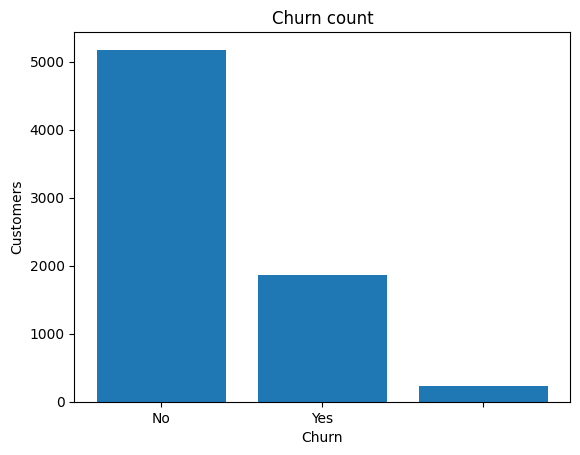

In [152]:
#Simple plot of churn counts
counts= df["Churn"].value_counts()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Churn count")
plt.xlabel("Churn")
plt.ylabel("Customers")
plt.show()


In [153]:
#Churn rate by contract type
contract_churn= df.groupby("Contract")["Churn_flag"].mean().sort_values(ascending=False)
(contract_churn*100).round(2)


,Churn_flag
Contract,
Month-to-month,42.71
One year,11.27
Two year,2.83


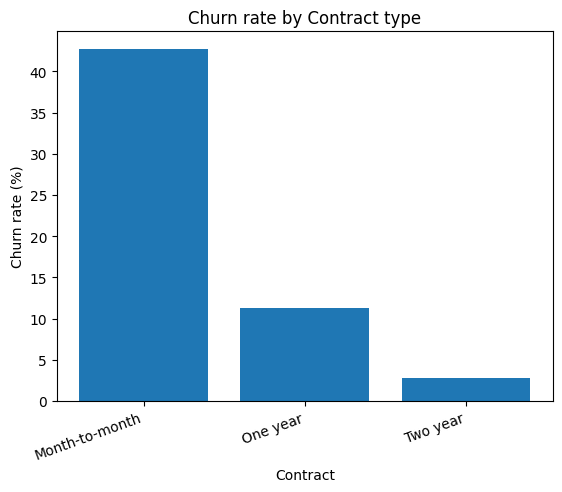

In [154]:
#Plot churn rate by contract
plt.figure()
plt.bar(contract_churn.index.astype(str),contract_churn.values*100)
plt.title("Churn rate by Contract type")
plt.xlabel("Contract")
plt.ylabel("Churn rate (%)")
plt.xticks(rotation=20, ha="right")
plt.show()


In [155]:
#Compare average tenure for churn vs non-churn
df.groupby("Churn")["tenure"].agg(["count","mean","median"]).round(2)


,count,mean,median
Churn,,,
,224,31.57,29.0
No,5174,37.57,38.0
Yes,1869,17.98,10.0


In [156]:
#Create tenure groups (months)
bins = [-1,3,6,12,24,48,60,999]
labels = ["0-3","4-6","7-12","13-24","25-48","49-60","60+"]

df["tenure_group"]= pd.cut(df["tenure"],bins=bins,labels=labels)

tenure_churn= df.groupby("tenure_group", observed=False)["Churn_flag"].mean()
(tenure_churn*100).round(2)


,Churn_flag
tenure_group,
0-3,56.21
4-6,44.63
7-12,35.89
13-24,28.71
25-48,20.39
49-60,14.42
60+,6.61


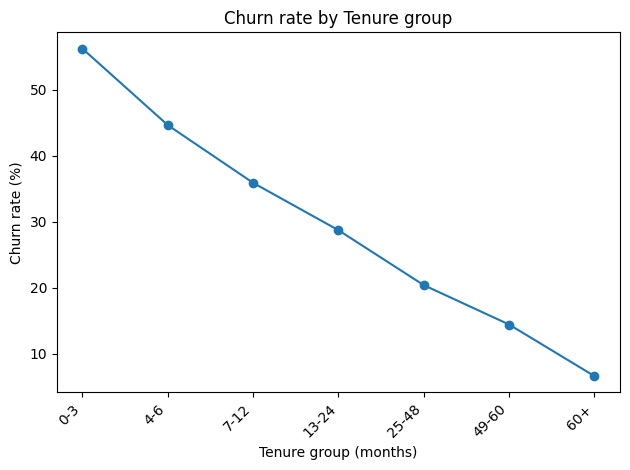

In [157]:
#Plot churn rate by tenure group
plt.figure()
plt.plot(tenure_churn.values*100, marker="o")
plt.title("Churn rate by Tenure group")
plt.xlabel("Tenure group (months)")
plt.ylabel("Churn rate (%)")
plt.xticks(range(len(tenure_churn.index)),tenure_churn.index.astype(str),rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [158]:
#Compare monthly charges for churn vs non-churn
df.groupby("Churn")["MonthlyCharges"].agg(["count","mean","median"]).round(2)


,count,mean,median
Churn,,,
,224,63.41,69.10
No,5174,61.27,64.43
Yes,1869,74.44,79.65


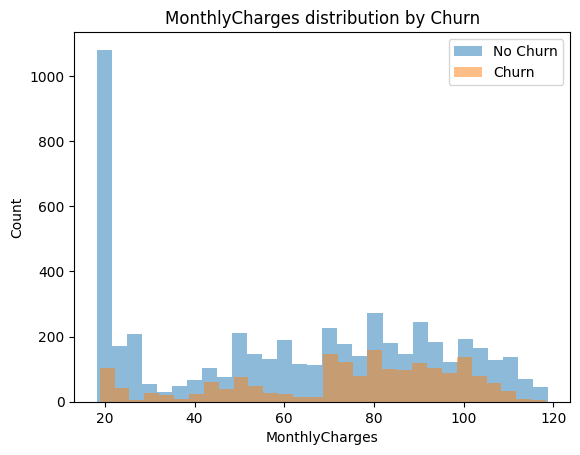

In [159]:
#Compare distributions
plt.figure()
plt.hist(df[df["Churn_flag"]==0]["MonthlyCharges"].dropna(),bins=30,alpha=0.5,label="No Churn")
plt.hist(df[df["Churn_flag"]==1]["MonthlyCharges"].dropna(),bins=30,alpha=0.5,label="Churn")
plt.title("MonthlyCharges distribution by Churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("Count")
plt.legend()
plt.show()


In [160]:
#Create 5 buckets of MonthlyCharges
tmp= df.dropna(subset=["MonthlyCharges", "Churn_flag"]).copy()
tmp["price_bucket"]= pd.qcut(tmp["MonthlyCharges"],q=5,duplicates="drop")

price_churn= tmp.groupby("price_bucket", observed=False)["Churn_flag"].mean()
(price_churn*100).round(2)


,Churn_flag
price_bucket,
"(18.249, 25.05]",9.15
"(25.05, 58.83]",24.98
"(58.83, 79.1]",29.77
"(79.1, 94.25]",36.11
"(94.25, 118.75]",32.81


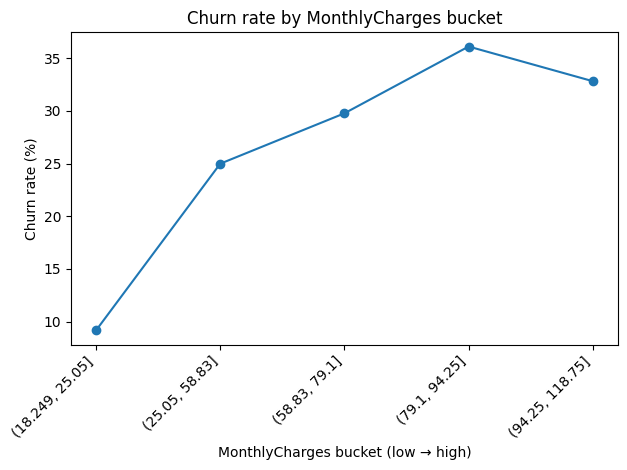

In [161]:
#Plot churn rate by price bucket
plt.figure()
plt.plot(price_churn.values*100,marker="o")
plt.title("Churn rate by MonthlyCharges bucket")
plt.xlabel("MonthlyCharges bucket (low → high)")
plt.ylabel("Churn rate (%)")
plt.xticks(range(len(price_churn.index)), [str(x) for x in price_churn.index],rotation=45,ha="right")
plt.tight_layout()
plt.show()


In [162]:
internet_churn= df.groupby("InternetService")["Churn_flag"].mean().sort_values(ascending=False)
(internet_churn*100).round(2)


,Churn_flag
InternetService,
Fiber optic,41.89
DSL,18.96
No,7.40


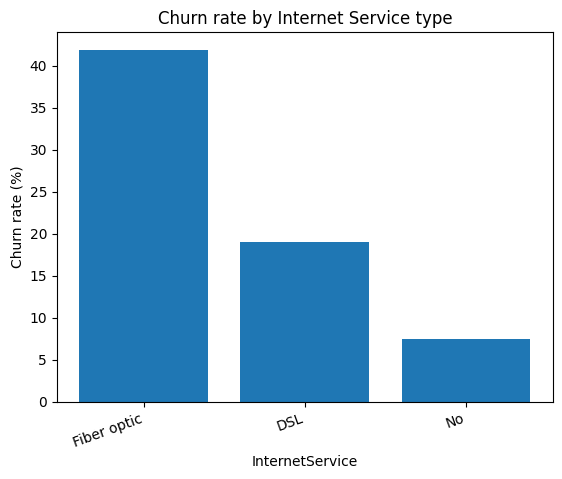

In [163]:
plt.figure()
plt.bar(internet_churn.index.astype(str),internet_churn.values*100)
plt.title("Churn rate by Internet Service type")
plt.xlabel("InternetService")
plt.ylabel("Churn rate (%)")
plt.xticks(rotation=20, ha="right")
plt.show()


In [164]:
#Churn rate by OnlineSecurity
df.groupby("internet.OnlineSecurity")["Churn_flag"].mean().round(3)*100


,Churn_flag
internet.OnlineSecurity,
No,41.8
No internet service,7.4
Yes,14.6


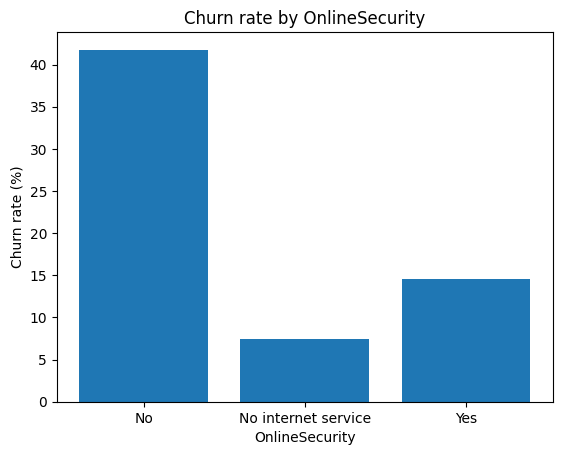

In [165]:
#Plot churn rate for OnlineSecurity
online_sec= df.groupby("internet.OnlineSecurity")["Churn_flag"].mean()*100

plt.figure()
plt.bar(online_sec.index.astype(str),online_sec.values)
plt.title("Churn rate by OnlineSecurity")
plt.xlabel("OnlineSecurity")
plt.ylabel("Churn rate (%)")
plt.show()


In [166]:
#Churn rate by TechSupport
df.groupby("internet.TechSupport")["Churn_flag"].mean().round(3)*100


,Churn_flag
internet.TechSupport,
No,41.6
No internet service,7.4
Yes,15.2


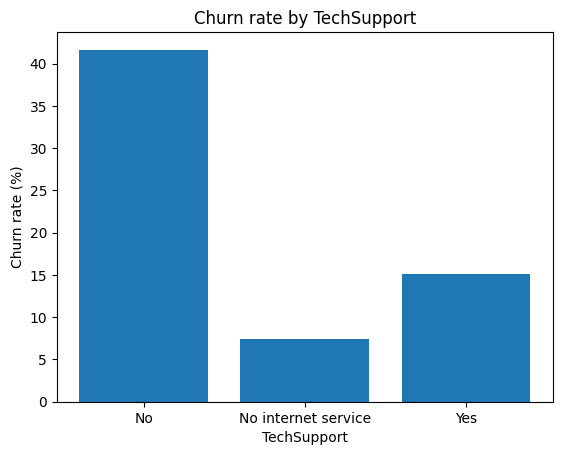

In [167]:
tech= df.groupby("internet.TechSupport")["Churn_flag"].mean()*100

plt.figure()
plt.bar(tech.index.astype(str), tech.values)
plt.title("Churn rate by TechSupport")
plt.xlabel("TechSupport")
plt.ylabel("Churn rate (%)")
plt.show()


In [168]:
#List of service-related columns
service_cols= [
    "internet.OnlineSecurity",
    "internet.OnlineBackup",
    "internet.DeviceProtection",
    "internet.TechSupport",
    "internet.StreamingTV",
    "internet.StreamingMovies",
    "phone.PhoneService",
    "phone.MultipleLines"
]

#Calculate churn rate for each service
for col in service_cols:
    print("\n----------------------------")
    print("Service:", col)
    print((df.groupby(col)["Churn_flag"].mean()*100).round(2))



----------------------------
Service: internet.OnlineSecurity
internet.OnlineSecurity
No                     41.77
No internet service     7.40
Yes                    14.61
Name: Churn_flag, dtype: float64

----------------------------
Service: internet.OnlineBackup
internet.OnlineBackup
No                     39.93
No internet service     7.40
Yes                    21.53
Name: Churn_flag, dtype: float64

----------------------------
Service: internet.DeviceProtection
internet.DeviceProtection
No                     39.13
No internet service     7.40
Yes                    22.50
Name: Churn_flag, dtype: float64

----------------------------
Service: internet.TechSupport
internet.TechSupport
No                     41.64
No internet service     7.40
Yes                    15.17
Name: Churn_flag, dtype: float64

----------------------------
Service: internet.StreamingTV
internet.StreamingTV
No                     33.52
No internet service     7.40
Yes                    30.07
Name: Chur

In [169]:
#Build a summary table with churn rates for services
results= []

for col in service_cols:
    temp= df.groupby(col)["Churn_flag"].mean().reset_index()
    temp["service"]= col
    temp["churn_rate_%"]= (temp["Churn_flag"]*100).round(2)
    results.append(temp[[ "service", col, "churn_rate_%"]])

service_churn_table= pd.concat(results,ignore_index=True)
service_churn_table


,service,internet.OnlineSecurity,churn_rate_%,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,phone.PhoneService,phone.MultipleLines
0,internet.OnlineSecurity,No,41.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,internet.OnlineSecurity,No internet service,7.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,internet.OnlineSecurity,Yes,14.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,internet.OnlineBackup,NaN,39.93,No,NaN,NaN,NaN,NaN,NaN,NaN
4,internet.OnlineBackup,NaN,7.40,No internet service,NaN,NaN,NaN,NaN,NaN,NaN
5,internet.OnlineBackup,NaN,21.53,Yes,NaN,NaN,NaN,NaN,NaN,NaN
6,internet.DeviceProtection,NaN,39.13,NaN,No,NaN,NaN,NaN,NaN,NaN
7,internet.DeviceProtection,NaN,7.40,NaN,No internet service,NaN,NaN,NaN,NaN,NaN
8,internet.DeviceProtection,NaN,22.50,NaN,Yes,NaN,NaN,NaN,NaN,NaN
9,internet.TechSupport,NaN,41.64,NaN,NaN,No,NaN,NaN,NaN,NaN


### Service Add-ons and Churn

The analysis shows that customers who subscribe to additional services such as
OnlineSecurity or TechSupport generally have lower churn rates.

This suggests that value-added services may improve customer retention.
However, this analysis is exploratory and does not prove causality.


#📄Informe final

# 4. Conclusions and Recommendations

## 4.1 Main Findings

The exploratory data analysis highlighted several factors associated with customer churn.

### Contract Type and Churn
Customers with **month-to-month contracts** show significantly higher churn rates compared to customers with long-term contracts.



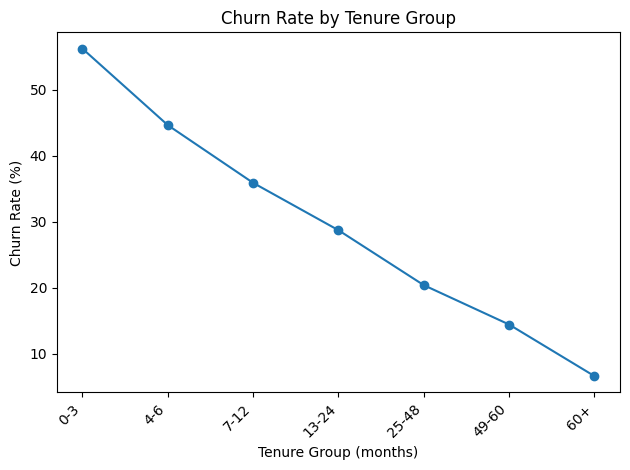

In [170]:
#Churn rate by tenure group
tenure_churn=df.groupby("tenure_group", observed=False)["Churn_flag"].mean()*100

plt.figure()
plt.plot(tenure_churn.values, marker="o")
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group (months)")
plt.ylabel("Churn Rate (%)")
plt.xticks(range(len(tenure_churn.index)),tenure_churn.index.astype(str),rotation=45, ha="right")
plt.tight_layout()
plt.show()


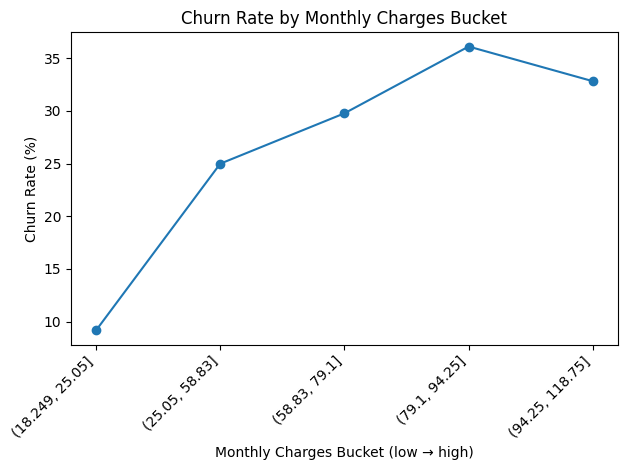

In [171]:
#Churn rate by MonthlyCharges buckets
tmp= df.dropna(subset=["MonthlyCharges", "Churn_flag"]).copy()
tmp["price_bucket"]= pd.qcut(tmp["MonthlyCharges"],q=5,duplicates="drop")

price_churn= tmp.groupby("price_bucket", observed=False)["Churn_flag"].mean()*100

plt.figure()
plt.plot(price_churn.values, marker="o")
plt.title("Churn Rate by Monthly Charges Bucket")
plt.xlabel("Monthly Charges Bucket (low → high)")
plt.ylabel("Churn Rate (%)")
plt.xticks(range(len(price_churn.index)), [str(x) for x in price_churn.index],rotation=45,ha="right")
plt.tight_layout()
plt.show()


Service Add-ons and Churn

Customers who subscribe to value-added services such as OnlineSecurity or TechSupport generally show lower churn rates.

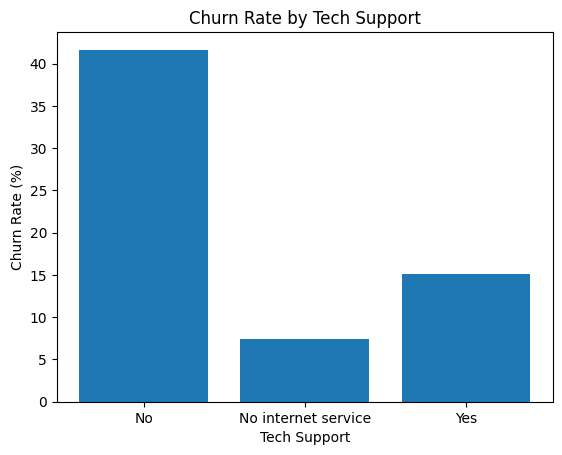

In [172]:
#Churn rate by TechSupport
tech_churn= df.groupby("internet.TechSupport")["Churn_flag"].mean()*100

plt.figure()
plt.bar(tech_churn.index.astype(str),tech_churn.values)
plt.title("Churn Rate by Tech Support")
plt.xlabel("Tech Support")
plt.ylabel("Churn Rate (%)")
plt.show()


#Business Recommendations

***Based on the findings above, the following actions are recommended:***

**Encourage Long-Term Contracts**

*Since churn is higher for month-to-month customers, TelecomX could incentivize longer contracts through discounts, bundled services, or loyalty benefits.*

**Strengthen Early Customer Retention**

*Retention efforts should focus on customers in their first months, with proactive onboarding and support to reduce early churn.*

**Promote Value-Added Services**

*Services such as OnlineSecurity and TechSupport should be promoted, especially to high-risk customers, as they are associated with lower churn.*

**Monitor Pricing and Perceived Value**

*While pricing effects are not conclusive, differences across price buckets suggest that ensuring a good balance between price and service value is important.*